# 실습과제3

보스턴 주택 데이터셋을 활용하여 Linear Regression을 학습시키시오.
1. 데이터를 시각화 하시오.
2. 회귀 계수, MSE, RMSE를 산출하시오
3. 어떤 변수가 가격에 어떠한 영향을 미치고 있는지 간략히 서술 하시오.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
boston = pd.read_csv("boston.csv")
boston.head()
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

CRIM: 도시의 인구 당 범죄율  
ZN: 25,000 평방피트 이상의 주택 구역 비율  
INDUS: 도시의 비소매 비즈니스 토지 비율  
CHAS: Charles 강 강변에 대한 더미 변수 (1: 강 경계, 0: 그렇지 않음)  
NOX: 산화 질소 농도 (ppm)  
RM: 주택 당 평균 방의 수  
AGE: 1940년 이전에 건설된 소유주택 비율  
DIS: 보스턴 고용 센터까지의 가중 거리  
RAD: 방사형 고속도로 접근성 지수  
TAX: 재산세율  
PTRATIO: 학생 대 교사 비율  
B: 1000(Bk - 0.63)^2, 여기서 Bk는 도시의 아프리카계 미국인 비율  
LSTAT: 인구 중 하위 계층 비율  

In [4]:
for i in range(len(boston.columns)-1):
    print(boston.columns[i], end = ", ")

CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, 

# 데이터 시각화

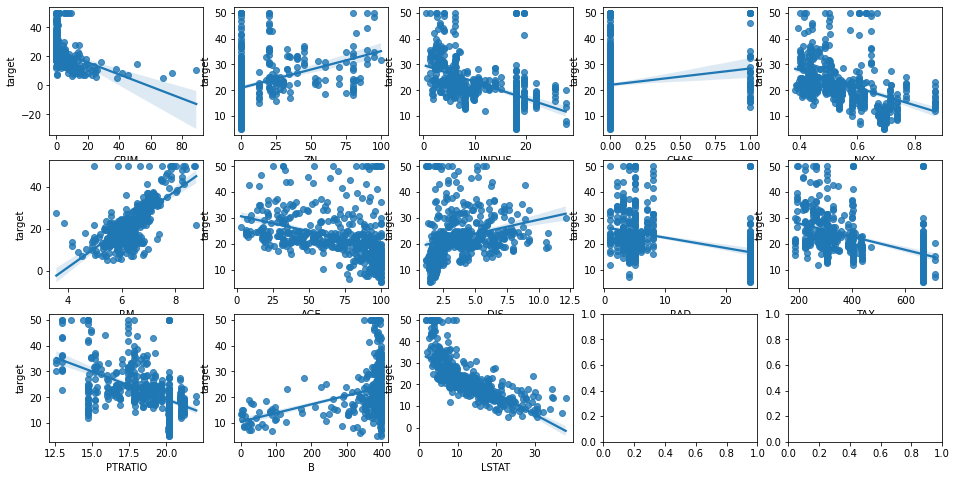

In [91]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 5, nrows = 3)

for i, feature in enumerate(boston.columns[:13]):
    row = int(i/5)
    col = i%5
    sns.regplot(data = boston, x = feature, y = "target" , ax = axs[row][col])
    
    
# for i in range(len(boston.columns) - 2):
#     plt.figure()
#     sns.scatterplot(x=boston.columns[i], y='target', data=boston)
#     plt.show()

In [6]:
df = boston
df["y"] = df["target"]

In [7]:
# fig, axs = plt.subplots(figsize = (16, 8), ncols = 5, nrows = 2)

# for i, feature in boston.columns:
#     row = int(i/5)
#     col = i%5
#     sns.regplot(data = df, x = feature, y = "y" , ax = axs[row][col])
    
# # row 행, col 열
# # axs[row][col] 어디에 해당 plot을 위치시킬지에 대한 것입니다.

# 모델 학습

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
selected_column = "RM"
X = df[selected_column].values
selected_column2 = "target"
y  = df[selected_column2].values
#y = boston["target"]

In [53]:

X, test_input, y, test_target = train_test_split(X, y, random_state = 42)

In [54]:
X = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [55]:

lr = LinearRegression()
lr.fit(X, y)
print(lr.intercept_, lr.coef_)

x_range = np.linspace(3, 10, 100).reshape(-1, 1)
predicted_values = lr.predict(x_range)

-35.92697627454079 [9.30417153]


<function matplotlib.pyplot.show(close=None, block=None)>

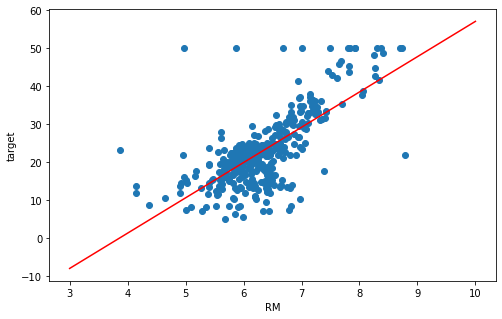

In [56]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y)
plt.plot(x_range, predicted_values, color='red')
plt.xlabel(selected_column)
plt.ylabel('target')
plt.show

In [57]:
print(lr.score(X, y))
print(lr.score(test_input, test_target))

0.504827127700064
0.38952758463985193


## **Polynomial Regression**(비선형)

In [77]:
# X = np.column_stack((X ** 2, X))
# test_poly = np.column_stack((test_input ** 2, test_input))

# lr = LinearRegression()
# lr.fit(X, y)

# print(lr.coef_, lr.intercept_)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
test_poly = poly_features.fit_transform(test_input)

In [67]:
X_poly[0]

array([ 7.155   , 51.194025])

In [78]:
test_poly[0]

array([ 6.416   , 41.165056])

In [68]:
lr = LinearRegression()
lr.fit(X_poly, y)
lr.intercept_, lr.coef_

(55.674608966574944, array([-19.24168431,   2.1950561 ]))

In [64]:
point = np.arange(3, 10)

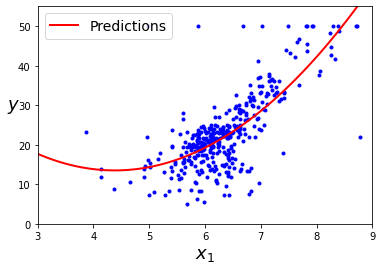

In [76]:
X_new=np.linspace(3, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([3, 9., 0, 55])
plt.show()

In [79]:
print(lr.score(X_poly, y))
print(lr.score(test_poly, test_target))

0.5532406397937808
0.5150725731822277


# 회귀계수 및 MSE, RMSE

#변수들에 대한 간략한 설명